Special thanks to following author whom I referenced from in creating this notebook:

https://jovian.ml/aakashns/03-logistic-regression

# Primer on Object Oriented Programming

Object Oriented Programming (OOP) is at the heart of many ML/DL based frameworks; without understanding it, it is easy to get lost amidst the seeming mess of code on public github repositories. OOP primarily revolves around the creation and use of classes and instances of them. In the example below, we create a Person class with its instance attributes, constructor and instance method.

In [ ]:
class Person(object):
  """
  This is a Person class
  """
  # constructor
  def __init__(self, name, age):
    # instance attributes
    self.name = name
    self.age = age

  # instance method
  def introduce(self):
    print(f"I am {self.name} and I am {self.age} years old.")

We then create an **instance** of the Person class called p1 and call the introduce function.

In [ ]:
p1 = Person("John Doe", 25)
p1.introduce()

I am John Doe and I am 25 years old.


But classes such as Person (above) are generic, and have attributes that can be reused for more specific classes of people, e.g. Policeman, Teacher. Hence, we can **inherit** from the Person class when creating these more specific classes. An example is shown below. 

In [ ]:
# child class PoliceMan of parent class Person
class PoliceMan(Person):

  def __init__(self, name, age, action):
    super(PoliceMan, self).__init__(name, age)
    self.action = action

  def work(self):
    print(f"I {self.action} criminals as my job.")

# another child class Teacher of parent class Peron
class Teacher(Person):

  def __init__(self, name, age, action):
    super(Teacher, self).__init__(name, age)
    self.action = action
  
  def work(self):
    print(f"I {self.action} students at a school.")

In [ ]:
p2 = PoliceMan("Bob", 32, "catch")
p2.introduce()
p2.work()

p3 = Teacher("Jane", 27, "teach")
p3.introduce()
p3.work()

I am Bob and I am 32 years old.
I catch criminals as my job.
I am Jane and I am 27 years old.
I teach students at a school.


One additional thing to note about classes is the ability to write something called magic methods in python. These methods are also called 'dunder' methods, and are recognized by the double _ before and after the method name. N.B. is __init__ is one of them!

Dunder methods add a lot of unseen functionality to our classes. For example, ever wondered why you could add 2 integers together? How does the plus sign implement its functionality in python?

In [ ]:
c = 3 + 2
c

5

But if we add 2 PoliceMan instances as per above together, we will definitely get an error! Of course, in real life, it doesn't make sense to add 2 PoliceMan together as well right...

In [ ]:
p4 = PoliceMan("Craig", 45, "apprehend")
p5 = PoliceMan("Jack", 33, "catch")
combined = p4 + p5

TypeError: ignored

But what if I told you that it is actually possible to add them together, with a little bit of modification to our original PoliceMan class of course.

In [ ]:
# modified PoliceMan class
class PoliceMan(Person):

  def __init__(self, name, age, action):
    super(PoliceMan, self).__init__(name, age)
    self.action = action

  def work(self):
    print(f"I {self.action} criminals as my job.")

  def __add__(self, other_police):
    total_police = self.name + " and " + other_police.name
    print(f"We are {total_police}. We now have a police station!")

In [ ]:
p4 = PoliceMan("Craig", 45, "apprehend")
p5 = PoliceMan("Jack", 33, "catch")
combined = p4 + p5

We are Craig and Jack. We now have a police station!


In fact, we can check the implemented dunder methods for each of the built in class/data types that we know of by using the dir method. 

You should know this by now: where is the dir functionality even implemented???

In [ ]:
dir(PoliceMan)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'introduce',
 'work']

In [ ]:
dir(int)

['__abs__',
 '__add__',
 '__and__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '__xor__',
 'bit_length',
 'conjugate',
 'denominator',
 'from_bytes',
 'imag',
 'numerator',
 'real',
 'to_bytes']

# Data

This notebook will give you an idea of how to predict numbers from images using Pytorch. We will build a simple Logistic Regression Neural Network to identify the digits, and you'll see at the end that we can get an accuracy of ~86.5%!

##The Data

We'll use the famous [*MNIST Handwritten Digits Database*] as our training dataset. It consists of 28px by 28px grayscale images of handwritten digits (0 to 9), along with labels for each image indicating which digit it represents. Here are some sample images from the dataset:

![mnist-sample](https://i.imgur.com/CAYnuo1.jpg)

## Exploring the Data

Import `torch` and `torchvision`. 

`torchvision` contains some utilities for working with image data. It also contains helper classes to automatically download and import popular datasets like MNIST.

In [ ]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [ ]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


When this statement is executed for the first time, it downloads the data to the `data/` directory next to the notebook and creates a PyTorch `Dataset`. On subsequent executions, the download is skipped as the data is already downloaded.

In [ ]:
# Check the size of the dataset
print(len(dataset))

60000


The dataset has 60,000 images which can be used to train the model. There is also an additonal test set of 10,000 images which can be created by passing `train=False` to the `MNIST` class.

In [ ]:
test_dataset = MNIST(root='data/', train=False)
print(len(test_dataset))

10000


## Visualising the data
Looking at a sample element from the training dataset:

In [ ]:
print(dataset[0])

(<PIL.Image.Image image mode=L size=28x28 at 0x7FF2CD94E470>, 5)


It's a tuple, consisting of a 28x28 image and a label. The image is an object of the class `PIL.Image.Image`, which is a part of the Python imaging library [Pillow](https://pillow.readthedocs.io/en/stable/). We can view the image within Jupyter using [`matplotlib`](https://matplotlib.org/)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Along with importing `matplotlib`, a special statement `%matplotlib inline` is added to indicate to Jupyter that we want to plot the graphs within the notebook. Without this line, Jupyter will show the image in a popup. Statements starting with `%` are called IPython magic commands, and are used to configure the behavior of Jupyter itself. You can find a full list of magic commands here: https://ipython.readthedocs.io/en/stable/interactive/magics.html .

Let's look at a couple of images from the dataset.

Label: 5


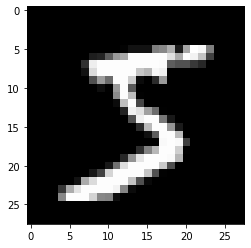

In [ ]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


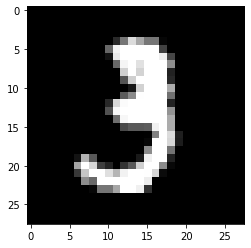

In [ ]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

## Reshaping

While it may be useful to visualise these images, there is just one problem: Pytorch does not recognise these raw images.

We need to convert the images into tensors. We can do this by specifying a transform while creating our dataset.

In [ ]:
import torchvision.transforms as transforms
import torch.nn.functional 

PyTorch datasets allow us to specify one or more transformation functions which are applied to the images as they are loaded. `torchvision.transforms` contains many such predefined functions, and we'll use the `ToTensor` transform to convert images into PyTorch tensors.

`torchvision.transforms` also contains many other [data augmentation techniques](https://pytorch.org/docs/stable/torchvision/transforms.html) that could be used to augment the images in the dataset before training on a model. 

In [ ]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [ ]:
img_tensor, label = dataset[0]
print(img_tensor.shape)

print(dataset)

torch.Size([1, 28, 28])
Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()


The image is now converted to a 1x28x28 tensor. The first dimension is used to keep track of the color channels. 

Since images in the MNIST dataset are grayscale, there's just one channel. Most other datasets have images with color, in which case there are 3 channels: red, green and blue (RGB), so their more common dimensions would be `[3, HEIGHT, WIDTH]`. 

Our MNIST dataset are greyscale values, hence, the first dimension = 1. Let's look at some sample values inside the tensor:

In [ ]:
# prints only 10th to 15th pixel of image

print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


The values range from 0 to 1, with 0 representing black, 1 white and the values in between different shades of grey. 

We plot the tensor as an image using `plt.imshow`.

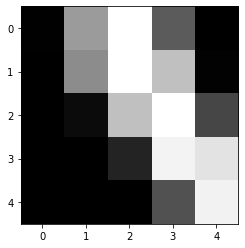

In [ ]:
# Plot the image by passing in the 28x28 matrix, prints only pixel value from 10 to 15th position
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

Note that we need to pass just the 28x28 matrix to `plt.imshow`, without a channel dimension. We also pass a colour map (`cmap=gray`) to indicate that we want to see a grayscale image.

## Training and Validation Datasets

While building real world machine learning models, it is quite common to split the dataset into 3 parts:

1. **Training set** - used to train the model i.e. compute the loss and adjust the weights of the model using gradient descent.
2. **Validation set** - used to evaluate the model while training, check for potential overfitting/underfitting and adjust hyperparameters (e.g. learning rate) accordingly.
3. **Test set** - used to compare different models after training and to see how accurate model is on dataset that it hasn't seen.

In the MNIST dataset, there are 60,000 training images, and 10,000 test images. The test set is standardized so that different researchers can report the results of their models against the same set of images. 

Since there's no predefined validation set, we must manually split the 60,000 images into training and validation datasets. We set aside 10,000 randomly chosen images for validation. We can do this using the `random_spilt` method from PyTorch.

**Why random split?**

It's important to choose a random sample for creating a validation set, because training data is often ordered by the target labels i.e. images of 0s, followed by images of 1s, followed by images of 2s and so on. If we were to pick a 10% validation set simply by selecting the last 10% of the images, the validation set would only consist of images of 8s and 9s, whereas the training set would contain no images of 8s and 9s. The trained model would not be that good as it has not seen images of 8s and 9s.

Below is a code snippet on how to split dataset:


In [ ]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

We can now created data loaders to help us load the data in batches. We'll use a batch size of 128.

We split dataset into batches because training on batches generally requires less memory, and also allows network to train faster with these mini-batches.

For more information on batch size, refer to this [forum](https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network#:~:text=Advantages%20of%20using%20a%20batch,dataset%20in%20your%20machine's%20memory).


In [ ]:
from torch.utils.data import DataLoader

#batch_size = 128

# train_loader and val_loader breaks dataset into batches
train_loader = DataLoader(train_ds, batch_size=128, shuffle=True, num_workers=4)
val_loader = DataLoader(val_ds, batch_size=128, shuffle=True, num_workers=4)

Visualise what train_loader and val_loader contain.

In [ ]:
# See first batch in train_loader
for batch in train_loader:
    print(batch)
    break

# The same can be done for val_loader, try it out and see for yourself!

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

We set `shuffle=True` for the training dataloader, so that the batches generated in each epoch are different, and this randomization helps generalize & speed up the training process. There is no need to shuffle images for validation dataloader since the it is used only for evaluating the model.

# Creating Model Class

## Final Activation Function

For each of the input images, we get 10 outputs, one for each class. As discussed earlier, we'd like these outputs to represent probabilities, but for that the elements of each output row must lie between 0 to 1 and add up to 1, which is clearly not the case here. (i.e. there are negative values in the sample outputs)

To convert the output rows into probabilities, we use the softmax function, which has the following formula:

![softmax](https://i.imgur.com/EAh9jLN.png)


In [ ]:
import torch.nn.functional as F

In [ ]:
labels = torch.Tensor([3.0, 5.0, 7.0])
F.softmax(labels)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


tensor([0.0159, 0.1173, 0.8668])

## Evaluation Metric and Loss Function

In [ ]:
# Combine into a single function
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


While the accuracy is a great way for evaluating the model, it can't be used as a loss function for optimizing our model using gradient descent, for the following reasons:

1. It's not a differentiable function. `torch.max` and `==` are both non-continuous and non-differentiable operations, so we can't use the accuracy for computing gradients w.r.t the weights and biases. They are simply functions that pick out the index with the highest probabilities.

2. It doesn't take into account the actual probabilities predicted by the model, so it can't provide sufficient feedback for incremental improvements. (i.e. gradient descent)

Due to these reasons, accuracy is a great **evaluation metric** for classification, but not a good loss function. A commonly used loss function for classification problems is the **cross entropy**, which has the following formula:

![cross-entropy](https://i.imgur.com/VDRDl1D.png)

While it looks complicated, it's actually quite simple:

* For each output row, pick the predicted probability for the correct label. E.g. if the predicted probabilities for an image are `[0.1, 0.3, 0.2, ...]` and the correct label is `1`, we pick the corresponding element `0.3` and ignore the rest.

* Then, take the logarithm of the picked probability. If the probability is high i.e. close to 1, then its logarithm is a very small negative value, close to 0. And if the probability is low (close to 0), then the logarithm is a very large negative value. We also multiply the result by -1, which results is a large postive value of the loss for poor predictions.

* Finally, take the average of the cross entropy across all the output rows to get the overall loss for a batch of data.

Unlike accuracy, cross-entropy is a continuous and differentiable function that also provides good feedback for incremental improvements in the model (a slightly higher probability for the correct label leads to a lower loss). This makes it a good choice for the loss function. 

As you might expect, PyTorch provides an efficient and tensor-friendly implementation of cross entropy as part of the `torch.nn.functional` package. Moreover, it also performs softmax internally, so we can directly pass in the outputs of the model without converting them into probabilities.

This sets the loss function:

In [ ]:
loss_fn = F.cross_entropy

## Optimizer

We are going to use the `optim.SGD` optimizer to update the weights and biases during training, with a learning rate which will be defined later within the fit function.

Configurations like batch size, learning rate etc. need to be picked in advance while training machine learning models, and are called hyperparameters. Picking the right hyperparameters is critical for training an accurate model within a reasonable amount of time, and is an active area of research and experimentation. You can try out different learning rates and see how it affects the training process.

In [ ]:
model = Model()
opt = torch.optim.SGD(model.parameters(), lr=1e-2)

## Debugging and Unit Testing

Now we've set up all the basic building blocks to finally put together a training loop. Hooray! Well, not quite.

It's always best to fix problems (bugs as we call them) as you go along rather than accummulate them and try to solve them at the very end. You will begin to realize that this is possible the more you practise as you begin to encounter very repetitive problems which you need to debug.

Bugs come in 2 different flavors: the kinds you can see and the kinds you can't. The first is generally easier to fix, because the console literally prints out everything wrong for you (seriously, the red lines aren't that scary after awhile). The second is much harder to fix due to the myriad of issues from which it can stem, and definitely differentiates the novice from the expert. But don't fret, even the best practitioners spend 90% of their modelling time debugging neural networks. 

In the spirit of solving problems as they come, it is good practice to write simple unit tests that help provide some sanity check along the way.

The first unit test tackles a super common bug which will perplex many beginners: shape issues. You are not a true practitioner if you have never faced such an issue before while trying to build a ML model. Thankfully, we almost always know that the problem lies mainly in 3 places: 1) Converting datasets into dataloaders 2) Passing the inputs from the dataloaders through the model 3) Calculating the loss between the labels and the predictions. 

In [ ]:
from torch import Tensor
from torch import nn
from functools import partial

In [ ]:
# Code out the model class here

class Model(nn.Module):

  def __init__(self, hidden_dims: list, input_size: int, num_classes: int):
    super(Model, self).__init__()
    self.hidden_dims = hidden_dims
    assert len(self.hidden_dims) <= 4, "Too many layers used."
    self.layers = []
    prev_dim = input_size
    for cur_dim in self.hidden_dims:
      self.layers.append(nn.Linear(prev_dim, cur_dim))
      self.layers.append(nn.Sigmoid())
      prev_dim = cur_dim
    self.layers.append(nn.Linear(prev_dim, num_classes))
    self.model = nn.ModuleList(self.layers)

  def forward(self, x: Tensor):
    B = x.shape[0]
    x = x.reshape(B, -1)
    for layer in self.model:
      x = layer(x)
    return x


In [ ]:
def test_shapes(train_dataset,
                valid_dataset,
                model, 
                loss_fn, num_classes):
  
  # check if there are shape issues with the data, e.g. need collating function
  train_dl = DataLoader(train_dataset, batch_size=32,
                      shuffle=True, num_workers=4)
                      
  valid_dl = DataLoader(valid_dataset, batch_size=8,
                        shuffle=False, num_workers=4)
  
  # check if there are issues with any layer in your model
  x_batch, y_batch = next(iter(train_loader))
  _, C, H, W = x_batch.shape
  model = model(input_size=C*H*W, num_classes=num_classes)
  print(model) 
  preds = model(x_batch)

  # check if there are any issues with the labels or output
  loss = loss_fn(preds, y_batch)
  return loss.item()

In [ ]:
model = partial(Model, hidden_dims=[300])
# should return a float value if there are no shape issues
test_shapes(train_ds,
            val_ds,
            model,
            loss_fn, 10)

Model(
  (model): ModuleList(
    (0): Linear(in_features=784, out_features=300, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=300, out_features=10, bias=True)
  )
)


2.3350913524627686

The second unit test is more generic and will also catch shape bugs from the previous step along with other possible bugs. We still recommend going ahead with the first unit test first though as it will get one issue out of the way. 

Andrej Karpathy, head of AI at OpenAI, once said that if your model can't overfit on a single batch of data, that is a **sure sign that your architecture doesn't work**. This makes sense because your model will begin to memorize the data after a few epochs and so should definitely overfit to that batch of data. 

Of course, the previous holds true if everything else is set correctly, e.g. learning rate is as extremely small (1e-6 or less), no regularization, data augmentation, simplest possible architecture without any form of layer normalizations, etc. What should the loss look like? It should start high and eventually (should not be too gradual) drop to 0: no plateauing, no increasing, no exploding, no oscillating. If your loss looks anything like what's been described not to happen, you're probably doing something wrong. 



Try overfitting this one batch of your data and see how it works out. We've attached links below for more details on debugging neural networks.

https://karpathy.github.io/2019/04/25/recipe/

https://pcc.cs.byu.edu/2017/10/02/practical-advice-for-building-deep-neural-networks/

In [ ]:
from torch.optim import Optimizer

In [ ]:
def overfit_one_batch(train_dl,
                      model,
                      loss_func,
                      opt,
                      num_classes,
                      device):
  
  first_batch = next(iter(train_dl))
  _, C, H, W = first_batch[0].shape
  model = model(input_size=C*H*W, num_classes=num_classes)
  model = model.to(device)
  opt = opt(params=model.parameters())
  model.train()
  for batch_idx, (data, target) in enumerate([first_batch] * 10000):
    train_batch, labels = first_batch[0].to(device), first_batch[1].to(device)
    preds = model(train_batch)
    loss = loss_func(preds, labels)
    print(loss.item())
    opt.zero_grad()
    loss.backward()
    opt.step()

In [ ]:
train_dl = DataLoader(train_ds, batch_size=8, shuffle=True)

# from this we can likely tell that using linear layers isn't a good strategy for images
# oh bother, let's go ahead with training anyway
opt = partial(torch.optim.SGD, lr=1e-2) # Import SGD optimizer directly
model = partial(Model, hidden_dims=[300])
num_classes = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
overfit_one_batch(train_dl,
                  model,
                  loss_fn,
                  opt,
                  num_classes,
                  device)

Streaming output truncated to the last 5000 lines.
0.009115707129240036
0.009113172069191933
0.009110622107982635
0.00910811685025692
0.009105551987886429
0.009103076532483101
0.009100526571273804
0.009097990579903126
0.009095500223338604
0.0090929651632905
0.00909045897424221
0.009087923914194107
0.009085402823984623
0.009082897566258907
0.009080377407371998
0.009077901020646095
0.009075351059436798
0.009072860702872276
0.009070338681340218
0.009067803621292114
0.009065298363566399
0.009062792174518108
0.009060315787792206
0.009057795628905296
0.00905529037117958
0.009052769280970097
0.009050292894244194
0.009047801606357098
0.009045295417308807
0.009042790159583092
0.009040284901857376
0.009037807583808899
0.009035301394760609
0.009032825008034706
0.009030318818986416
0.009027858264744282
0.009025395847856998
0.009022904559969902
0.00902041420340538
0.009017937816679478
0.009015415795147419
0.009012925438582897
0.009010478854179382
0.009007957763969898
0.009005525149405003
0.00900301

## Training the model

Now that we have defined the data loaders, model, loss function and optimizer, we are ready to train the model.



In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

def train_and_evaluate(train_dl,
                       valid_dl,
                       model,
                       opt,
                       loss_func,
                       epochs,
                       device):
  
  train_history = []
  val_history = []

  for epoch in range(epochs):
    print(f"\n\nEPOCH {epoch}\n\n")
    model.train()
    for i, (train_batch, labels) in enumerate(train_dl):
      train_batch, labels = train_batch.to(device), labels.to(device)
      preds = model(train_batch)
      loss = loss_func(preds, labels)
      acc = accuracy(preds, labels)
      print(f"Train Loss: {loss}    Train Acc:  {acc}  at batch {i}.")
      train_history.append((loss, acc))
      opt.zero_grad()
      loss.backward()
      opt.step()

    model.eval()
    with torch.no_grad():
      for j, (val_batch, labels) in enumerate(valid_dl):
        val_batch, labels = val_batch.to(device), labels.to(device)
        preds = model(val_batch)
        loss = loss_func(preds, labels)
        acc = accuracy(preds, labels)
        print(f"Valid Loss: {loss}    Valid Acc:  {acc}  at batch {j}.")
        val_history.append((loss, acc))

  return train_history, val_history

In [ ]:
input_size = 1 * 28 * 28
num_classes = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Model(hidden_dims=[300],
              input_size=input_size,
              num_classes=num_classes).to(device)
opt = torch.optim.SGD(model.parameters(), lr=1e-2)
train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)
valid_dl = DataLoader(train_ds, batch_size=32, shuffle=False)

train_history, val_history = train_and_evaluate(train_dl=train_dl, 
                                                valid_dl=valid_dl,
                                                model=model,
                                                opt=opt,
                                                loss_func=loss_fn,
                                                epochs=3,
                                                device=device)

Streaming output truncated to the last 5000 lines.
Valid Loss: 2.0704398155212402    Valid Acc:  0.5  at batch 1263.
Valid Loss: 1.9882088899612427    Valid Acc:  0.59375  at batch 1264.
Valid Loss: 1.9380813837051392    Valid Acc:  0.5625  at batch 1265.
Valid Loss: 2.0191478729248047    Valid Acc:  0.59375  at batch 1266.
Valid Loss: 1.9500341415405273    Valid Acc:  0.6875  at batch 1267.
Valid Loss: 1.9100072383880615    Valid Acc:  0.75  at batch 1268.
Valid Loss: 1.9692661762237549    Valid Acc:  0.6875  at batch 1269.
Valid Loss: 1.8743853569030762    Valid Acc:  0.46875  at batch 1270.
Valid Loss: 1.9732939004898071    Valid Acc:  0.625  at batch 1271.
Valid Loss: 1.903684139251709    Valid Acc:  0.71875  at batch 1272.
Valid Loss: 2.024416923522949    Valid Acc:  0.375  at batch 1273.
Valid Loss: 1.9772415161132812    Valid Acc:  0.65625  at batch 1274.
Valid Loss: 1.9340842962265015    Valid Acc:  0.59375  at batch 1275.
Valid Loss: 1.9575815200805664    Valid Acc:  0.59375  

In [ ]:
def plots(history):
  loss, acc = zip(*history)
  fig, (loss_plot, acc_plot) = plt.subplots(1, 2, figsize=(20, 10))
  loss_plot.plot(loss, '-x')
  loss_plot.set(xlabel="Batch", ylabel="Loss")
  loss_plot.set_title("Loss")

  acc_plot.plot(acc, '-x')
  acc_plot.set(xlabel="Batch", ylabel="Accuracy")
  acc_plot.set_title("Accuracy") 
  plt.show()

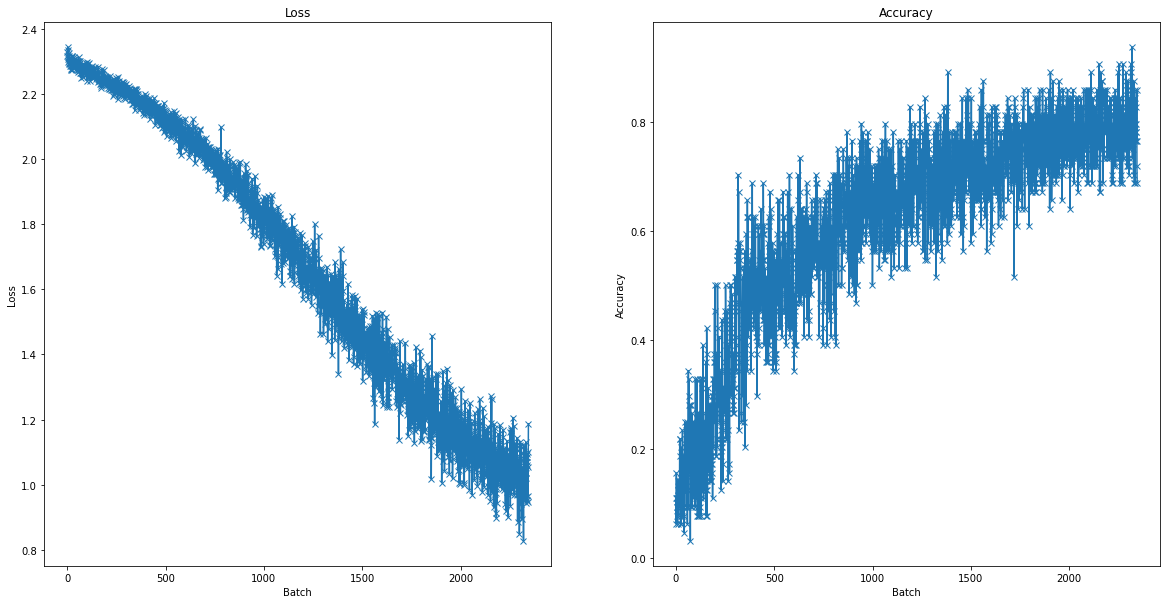

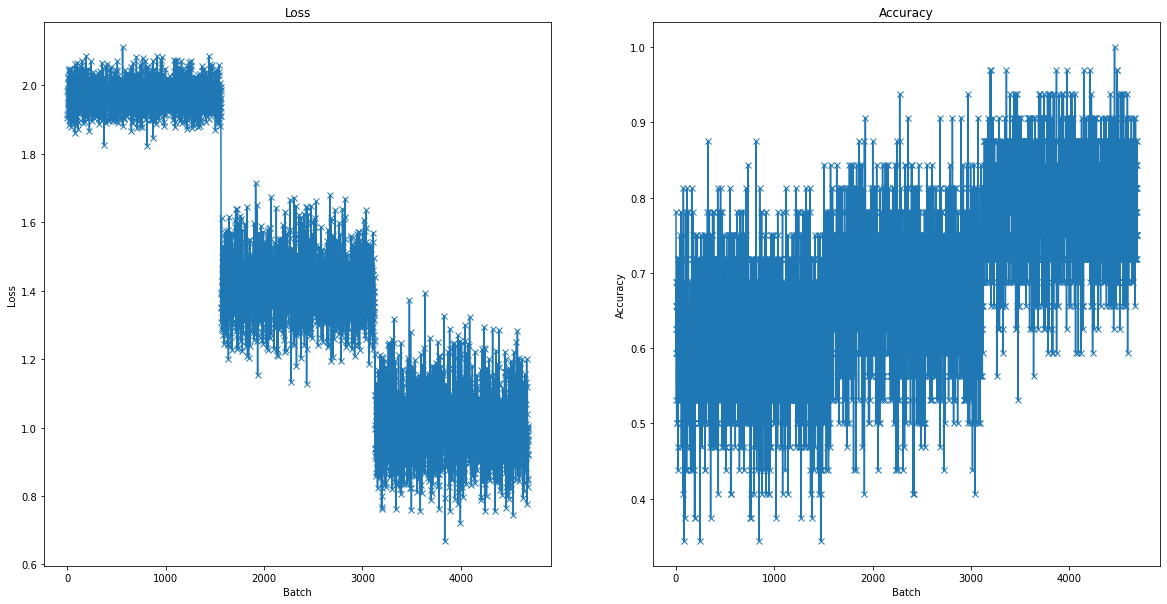

In [ ]:
plots(train_history)
plots(val_history)

## Testing with individual images

In [ ]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Let's define a helper function `predict_image`, which returns the predicted label for a single image tensor.

In [ ]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


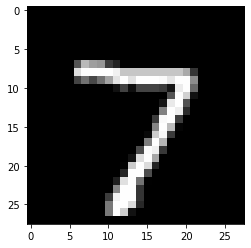

In [ ]:
model.to("cpu")
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


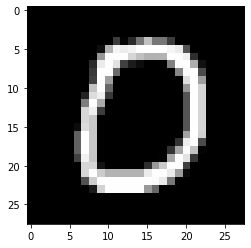

In [ ]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

## Extras: Saving and loading the model

It would be a good idea to save our model since we've trained it for a long time and achieved reasonable accuracy. 

Don't ever just save to colab as the files will get lost after runtime disconnects - always save to your drive  

**When saving the model, we are actually saving the parameters (weights and bias matrices) to a file.**

In [ ]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

The `.state_dict` method returns an `OrderedDict` containing all the weights and bias matrices mapped to the right attributes of the model.

In [ ]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0340, -0.0343, -0.0326,  ..., -0.0117,  0.0193, -0.0325],
                      [ 0.0190,  0.0165, -0.0352,  ..., -0.0333,  0.0079,  0.0047],
                      [-0.0232, -0.0181, -0.0190,  ..., -0.0034, -0.0288,  0.0015],
                      ...,
                      [-0.0289, -0.0074, -0.0120,  ...,  0.0272,  0.0035,  0.0215],
                      [ 0.0334, -0.0243,  0.0121,  ...,  0.0342, -0.0335, -0.0303],
                      [ 0.0277, -0.0229, -0.0316,  ..., -0.0086,  0.0267,  0.0145]])),
             ('linear.bias',
              tensor([-0.0379,  0.1232, -0.0117, -0.0179, -0.0009,  0.0137, -0.0091,  0.0544,
                      -0.1006,  0.0053]))])

To load the model weights, we can instante a new object of the class `MnistModel`, and use the `.load_state_dict` method.

In [ ]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0340, -0.0343, -0.0326,  ..., -0.0117,  0.0193, -0.0325],
                      [ 0.0190,  0.0165, -0.0352,  ..., -0.0333,  0.0079,  0.0047],
                      [-0.0232, -0.0181, -0.0190,  ..., -0.0034, -0.0288,  0.0015],
                      ...,
                      [-0.0289, -0.0074, -0.0120,  ...,  0.0272,  0.0035,  0.0215],
                      [ 0.0334, -0.0243,  0.0121,  ...,  0.0342, -0.0335, -0.0303],
                      [ 0.0277, -0.0229, -0.0316,  ..., -0.0086,  0.0267,  0.0145]])),
             ('linear.bias',
              tensor([-0.0379,  0.1232, -0.0117, -0.0179, -0.0009,  0.0137, -0.0091,  0.0544,
                      -0.1006,  0.0053]))])